## Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

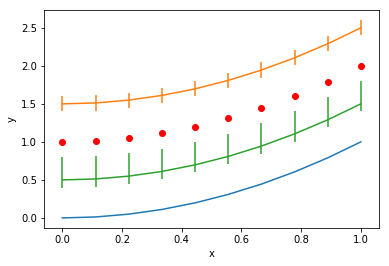

In [381]:
fig, ax = plt.subplots()
x = np.linspace(0, 1, 10)
y = x**2
e_y = 0.1 * np.ones_like(x)
ax.plot(x, y);
ax.scatter(x, y + 1, c = 'r')
ax.errorbar(x, y + 1.5, yerr = e_y)
ax.errorbar(x, y + 0.5, yerr = [e_y, 3 * e_y])
ax.set_xlabel("x")
ax.set_ylabel("y")

0 0
0 1
1 0
1 1


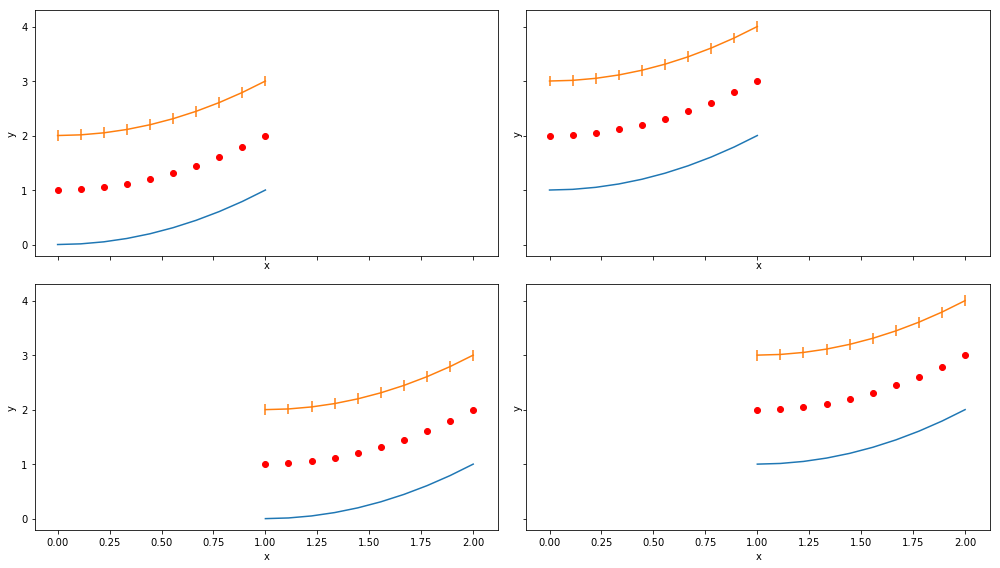

In [382]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (14, 8), sharex = True, sharey = True)
x = np.linspace(0, 1, 10)
y = x**2
e_y = 0.1 * np.ones_like(x)
for i, axi in enumerate(ax):
    for j, axij in enumerate(axi):
        print(i, j)
        axij.plot(x + i, y + j);
        axij.scatter(x + i, y + 1 + j, c = 'r')
        axij.errorbar(x + i, y + 2 + j, yerr = e_y)
        axij.set_xlabel("x")
        axij.set_ylabel("y")
plt.tight_layout()

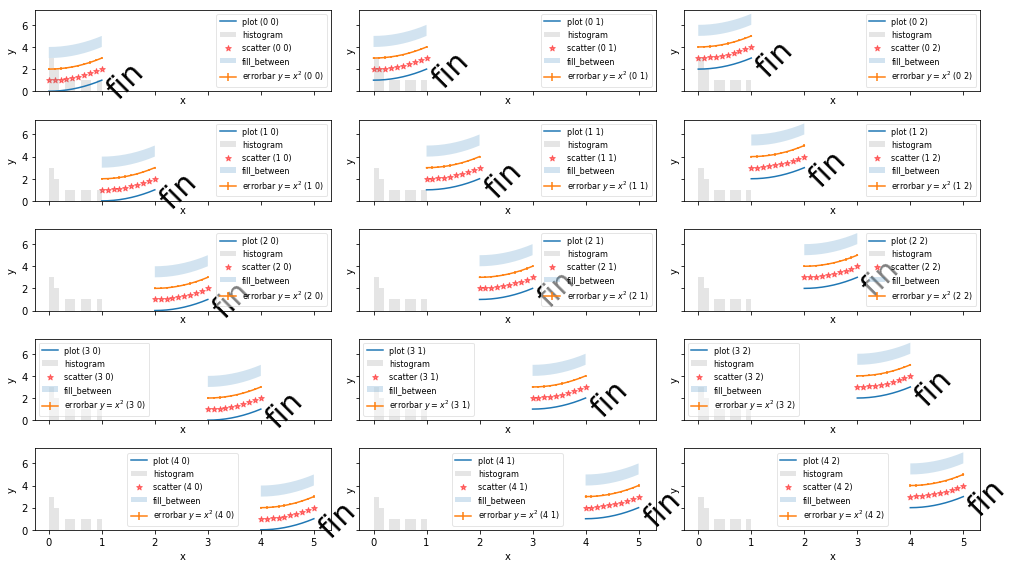

In [384]:
fig, ax = plt.subplots(ncols = 3, nrows = 5, figsize = (14, 8), sharex = True, sharey = True)
x = np.linspace(0, 1, 10)
y = x**2
e_y = 0.1 * np.ones_like(x)
for i, axi in enumerate(ax):
    for j, axij in enumerate(axi):
        axij.plot(x + i, y + j, label = "plot (%i %i)" % (i, j));
        axij.scatter(x + i, y + 1 + j, c = 'r', label = "scatter (%i %i)" % (i, j), alpha = 0.5, marker = '*')
        axij.errorbar(x + i, y + 2 + j, yerr = e_y, label = "errorbar $y = x^2$ (%i %i)" % (i, j))
        axij.hist(y, alpha = 0.2, color = 'gray', label = "histogram")
        axij.text(x[-1] + i, y[-1] + j, "fin", rotation = 45, fontsize = 30)
        axij.fill_between(x + i, y + j + 3, y + j + 4, label = "fill_between", alpha = 0.2)
        axij.legend(fontsize = 8, framealpha = 0.5)
        axij.set_xlabel("x")
        axij.set_ylabel("y")
plt.tight_layout()

* See many more examples in here:
    http://matplotlib.org/gallery.html
    
* Google and stackoverflow are your friends!

# Numpy structured and record arrays

In [385]:
x = np.array([('Chile', 17.91, 56), ('Argentina', 43.417, 54)], dtype=[('pais', 'S10'),('poblacion', 'f4'), ('codigo', 'i4')])
print(x)
print(x.dtype)
print(np.shape(x))
print(x[0], x[1])
print(x['pais'])
print(x['poblacion'])
print(x['codigo'])
x

[(b'Chile',  17.90999985, 56) (b'Argentina',  43.41699982, 54)]
[('pais', 'S10'), ('poblacion', '<f4'), ('codigo', '<i4')]
(2,)
(b'Chile',  17.90999985, 56) (b'Argentina',  43.41699982, 54)
[b'Chile' b'Argentina']
[ 17.90999985  43.41699982]
[56 54]


array([(b'Chile',  17.90999985, 56), (b'Argentina',  43.41699982, 54)], 
      dtype=[('pais', 'S10'), ('poblacion', '<f4'), ('codigo', '<i4')])

In [390]:
print(str(x[1][0]))
print(x[0][1])
print(x[1]['pais'])
print(x['pais'][1])

b'Argentina'
17.91
b'Argentina'
b'Argentina'


In [391]:
x = np.array([('Chile', 17.91, 56), ('Argentina', 43.417, 54)], 
             dtype={'names':['pais', 'poblacion', 'codigo'], 'formats':['S10', 'f4', 'i4']})
x

array([(b'Chile',  17.90999985, 56), (b'Argentina',  43.41699982, 54)], 
      dtype=[('pais', 'S10'), ('poblacion', '<f4'), ('codigo', '<i4')])

#### dtypes examples
dt = np.dtype('i4')   # 32-bit signed integer

dt = np.dtype('f8')   # 64-bit floating-point number

dt = np.dtype('c16')  # 128-bit complex floating-point number

dt = np.dtype('a25')  # 25-length zero-terminated bytes

dt = np.dtype('U25')  # 25-character string

In [392]:
print(x.dtype)
print(x.dtype.names)

[('pais', 'S10'), ('poblacion', '<f4'), ('codigo', '<i4')]
('pais', 'poblacion', 'codigo')


In [9]:
print(x[['pais', 'codigo']])

[(b'Chile', 56) (b'Argentina', 54)]


In [393]:
x = np.rec.array([('Chile', 17.91, 56), ('Argentina', 43.417, 54)], 
             dtype={'names':['pais', 'poblacion', 'codigo'], 'formats':['S10', 'f4', 'i4']})

In [394]:
print(x['pais'])
print(x.pais)
print(x.poblacion)
print(x[0].poblacion)

[b'Chile' b'Argentina']
[b'Chile' b'Argentina']
[ 17.90999985  43.41699982]
17.91


# Pandas

In [395]:
import pandas as pd

### Pandas DataFrame
Composed of three components:
 - data
 - indices
 - columns

Series: One dimensional labeled array, capable of holding any data type with labels or index
DataFrame: Two dimensional labeled data structure with columns of potentially different types
Panel: Container for 3D data

In [396]:
data = np.array([['', 'Col1', 'Col2'],
                ['Row1', 1, 2],
                ['Row2', 3, 4]])
print(data)
print()
                
print(pd.DataFrame(data=data[1:, 1:],
                  index=data[1:, 0],
                  columns=data[0, 1:]))

[['' 'Col1' 'Col2']
 ['Row1' '1' '2']
 ['Row2' '3' '4']]

     Col1 Col2
Row1    1    2
Row2    3    4


In [397]:
# array
my_2darray = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))
print(my_2darray)
print()

# dictionary
my_dict = pd.DataFrame({1: ['1', '3'], 2: ['1', '2'], 3: ['2', '4']})
print(my_dict)
print()

# DataFrame 
my_df = pd.DataFrame(data=[4,5,6,7], index=range(0,4), columns=['A'])
print(my_df)
print()

# Series (note sorting)
my_series = pd.Series({"India":"New Delhi", "Belgium":"Brussels", "United Kingdom":"London", "United States":"Washington"})
print(my_series)
print()
my_seriesDF = pd.DataFrame(my_series)
print(my_seriesDF)

   0  1  2
0  1  2  3
1  4  5  6

   1  2  3
0  1  1  2
1  3  2  4

   A
0  4
1  5
2  6
3  7

Belgium             Brussels
India              New Delhi
United Kingdom        London
United States     Washington
dtype: object

                         0
Belgium           Brussels
India            New Delhi
United Kingdom      London
United States   Washington


In [398]:
print(my_seriesDF.shape)
print(my_seriesDF.index)
print(len(my_seriesDF))

(4, 1)
Index(['Belgium', 'India', 'United Kingdom', 'United States'], dtype='object')
4


In [16]:
print(my_2darray.columns)
print(list(my_2darray.columns))
print(my_2darray.columns.values)

RangeIndex(start=0, stop=3, step=1)
[0, 1, 2]
[0 1 2]


In [399]:
# dictionary
df = pd.DataFrame({'A': [1, 4, 7], 'B': [2, 5, 8], 'C': [3, 6, 9]})
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


In [18]:
print(df.iloc[0][0])

print(df.loc[0]['A'])

print(df.at[0,'A'])

print(df.iat[0,0])

print(df.get_value(0, 'A'))

1
1
1
1
1


In [400]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2, 'A', 4], columns=[48, 49, 50])
print(df)

   48  49  50
2   1   2   3
A   4   5   6
4   7   8   9


In [401]:
print(df.iloc[2])
print(df.loc[2])

48    7
49    8
50    9
Name: 4, dtype: int64
48    1
49    2
50    3
Name: 2, dtype: int64


In [403]:
df['C'] = df[49]
print(df)

   48  49  50  B  C
2   1   2   3  1  2
A   4   5   6  4  5
4   7   8   9  7  8


## Pandas tutorial:
    
 From [this webpage.](https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [404]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [405]:
dates = pd.date_range('20130101', periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [438]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)
df.describe()

                   A         B         C         D
2013-01-01 -0.391911  1.043074 -1.103323 -1.728460
2013-01-02  1.061599 -0.354971  1.588389 -0.854733
2013-01-03  0.567916  0.709120 -1.161113  1.846709
2013-01-04  1.842782  0.357393 -1.140868  0.809276
2013-01-05 -2.220433 -0.718169  0.952766 -0.145316
2013-01-06 -0.441898 -0.115730 -1.099483 -1.155774


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.069676,0.153453,-0.327272,-0.204716
std,1.420946,0.668201,1.254117,1.333333
min,-2.220433,-0.718169,-1.161113,-1.728460
25%,-0.429401,-0.295160,-1.131482,-1.080513
50%,0.088002,0.120831,-1.101403,-0.500025
75%,0.938178,0.621188,0.439704,0.570628
max,1.842782,1.043074,1.588389,1.846709


In [439]:
df2 = pd.DataFrame({ 'A' : 1., 
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [440]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [441]:
df2.<TAB>

SyntaxError: invalid syntax (<ipython-input-441-e8d0e54abc86>, line 1)

In [442]:
df.head(2)

,A,B,C,D
2013-01-01,-0.391911,1.043074,-1.103323,-1.728460
2013-01-02,1.061599,-0.354971,1.588389,-0.854733


In [443]:
df.tail(3)

,A,B,C,D
2013-01-04,1.842782,0.357393,-1.140868,0.809276
2013-01-05,-2.220433,-0.718169,0.952766,-0.145316
2013-01-06,-0.441898,-0.115730,-1.099483,-1.155774


In [444]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [445]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [446]:
df.values

array([[-0.39191143,  1.04307399, -1.10332265, -1.72846015],
       [ 1.06159891, -0.35497071,  1.58838928, -0.85473344],
       [ 0.56791568,  0.70912024, -1.16111299,  1.8467093 ],
       [ 1.84278211,  0.35739271, -1.14086801,  0.80927603],
       [-2.22043345, -0.71816906,  0.95276598, -0.14531623],
       [-0.44189785, -0.11572979, -1.09948309, -1.15577352]])

In [447]:
#df["E"] = 'test'
#df

In [448]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.069676,0.153453,-0.327272,-0.204716
std,1.420946,0.668201,1.254117,1.333333
min,-2.220433,-0.718169,-1.161113,-1.728460
25%,-0.429401,-0.295160,-1.131482,-1.080513
50%,0.088002,0.120831,-1.101403,-0.500025
75%,0.938178,0.621188,0.439704,0.570628
max,1.842782,1.043074,1.588389,1.846709


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes


In [450]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.391911,1.061599,0.567916,1.842782,-2.220433,-0.441898
B,1.043074,-0.354971,0.709120,0.357393,-0.718169,-0.115730
C,-1.103323,1.588389,-1.161113,-1.140868,0.952766,-1.099483
D,-1.728460,-0.854733,1.846709,0.809276,-0.145316,-1.155774


In [451]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.728460,-1.103323,1.043074,-0.391911
2013-01-02,-0.854733,1.588389,-0.354971,1.061599
2013-01-03,1.846709,-1.161113,0.709120,0.567916
2013-01-04,0.809276,-1.140868,0.357393,1.842782
2013-01-05,-0.145316,0.952766,-0.718169,-2.220433
2013-01-06,-1.155774,-1.099483,-0.115730,-0.441898


In [452]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-2.220433,-0.718169,0.952766,-0.145316
2013-01-02,1.061599,-0.354971,1.588389,-0.854733
2013-01-06,-0.441898,-0.115730,-1.099483,-1.155774
2013-01-04,1.842782,0.357393,-1.140868,0.809276
2013-01-03,0.567916,0.709120,-1.161113,1.846709
2013-01-01,-0.391911,1.043074,-1.103323,-1.728460


In [453]:
df['A']

2013-01-01   -0.391911
2013-01-02    1.061599
2013-01-03    0.567916
2013-01-04    1.842782
2013-01-05   -2.220433
2013-01-06   -0.441898
Freq: D, Name: A, dtype: float64

In [454]:
df[0:3]

,A,B,C,D
2013-01-01,-0.391911,1.043074,-1.103323,-1.728460
2013-01-02,1.061599,-0.354971,1.588389,-0.854733
2013-01-03,0.567916,0.709120,-1.161113,1.846709


In [455]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.061599,-0.354971,1.588389,-0.854733
2013-01-03,0.567916,0.709120,-1.161113,1.846709
2013-01-04,1.842782,0.357393,-1.140868,0.809276


In [456]:
df.loc[dates[0]]

A   -0.391911
B    1.043074
C   -1.103323
D   -1.728460
Name: 2013-01-01 00:00:00, dtype: float64

In [457]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.391911,1.043074
2013-01-02,1.061599,-0.354971
2013-01-03,0.567916,0.709120
2013-01-04,1.842782,0.357393
2013-01-05,-2.220433,-0.718169
2013-01-06,-0.441898,-0.115730


In [458]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.061599,-0.354971
2013-01-03,0.567916,0.709120
2013-01-04,1.842782,0.357393


In [459]:
df.loc['20130102',['A','B']]

A    1.061599
B   -0.354971
Name: 2013-01-02 00:00:00, dtype: float64

In [460]:
df.loc[dates[0],'A']

-0.39191142846956462

In [461]:
df.at[dates[0],'A']

-0.39191142846956462

In [462]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.061599,-0.354971,1.588389,-0.854733
2013-01-03,0.567916,0.709120,-1.161113,1.846709
2013-01-04,1.842782,0.357393,-1.140868,0.809276


In [463]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.043074,NaN,NaN
2013-01-02,1.061599,NaN,1.588389,NaN
2013-01-03,0.567916,0.709120,NaN,1.846709
2013-01-04,1.842782,0.357393,NaN,0.809276
2013-01-05,NaN,NaN,0.952766,NaN
2013-01-06,NaN,NaN,NaN,NaN


In [464]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

In [465]:
df2

,A,B,C,D,E
2013-01-01,-0.391911,1.043074,-1.103323,-1.728460,one
2013-01-02,1.061599,-0.354971,1.588389,-0.854733,one
2013-01-03,0.567916,0.709120,-1.161113,1.846709,two
2013-01-04,1.842782,0.357393,-1.140868,0.809276,three
2013-01-05,-2.220433,-0.718169,0.952766,-0.145316,four
2013-01-06,-0.441898,-0.115730,-1.099483,-1.155774,three


In [466]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.567916,0.709120,-1.161113,1.846709,two
2013-01-05,-2.220433,-0.718169,0.952766,-0.145316,four


In [468]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

### Updating a data frame

In [470]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.391911,1.043074,-1.103323,-1.728460,NaN
2013-01-02,1.061599,-0.354971,1.588389,-0.854733,1.0
2013-01-03,0.567916,0.709120,-1.161113,1.846709,2.0
2013-01-04,1.842782,0.357393,-1.140868,0.809276,3.0
2013-01-05,-2.220433,-0.718169,0.952766,-0.145316,4.0
2013-01-06,-0.441898,-0.115730,-1.099483,-1.155774,5.0


In [471]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,1.043074,-1.103323,-1.728460,NaN
2013-01-02,1.061599,-0.354971,1.588389,-0.854733,1.0
2013-01-03,0.567916,0.709120,-1.161113,1.846709,2.0
2013-01-04,1.842782,0.357393,-1.140868,0.809276,3.0
2013-01-05,-2.220433,-0.718169,0.952766,-0.145316,4.0
2013-01-06,-0.441898,-0.115730,-1.099483,-1.155774,5.0


In [472]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.103323,-1.728460,NaN
2013-01-02,1.061599,-0.354971,1.588389,-0.854733,1.0
2013-01-03,0.567916,0.709120,-1.161113,1.846709,2.0
2013-01-04,1.842782,0.357393,-1.140868,0.809276,3.0
2013-01-05,-2.220433,-0.718169,0.952766,-0.145316,4.0
2013-01-06,-0.441898,-0.115730,-1.099483,-1.155774,5.0


In [473]:
df[0, 2] = 0
df

,A,B,C,D,F,"(0, 2)"
2013-01-01,0.000000,0.000000,-1.103323,-1.728460,NaN,0
2013-01-02,1.061599,-0.354971,1.588389,-0.854733,1.0,0
2013-01-03,0.567916,0.709120,-1.161113,1.846709,2.0,0
2013-01-04,1.842782,0.357393,-1.140868,0.809276,3.0,0
2013-01-05,-2.220433,-0.718169,0.952766,-0.145316,4.0,0
2013-01-06,-0.441898,-0.115730,-1.099483,-1.155774,5.0,0


In [474]:
df = df.drop((0,2), axis = 1)
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.103323,-1.728460,NaN
2013-01-02,1.061599,-0.354971,1.588389,-0.854733,1.0
2013-01-03,0.567916,0.709120,-1.161113,1.846709,2.0
2013-01-04,1.842782,0.357393,-1.140868,0.809276,3.0
2013-01-05,-2.220433,-0.718169,0.952766,-0.145316,4.0
2013-01-06,-0.441898,-0.115730,-1.099483,-1.155774,5.0


In [475]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.103323,5,NaN
2013-01-02,1.061599,-0.354971,1.588389,5,1.0
2013-01-03,0.567916,0.709120,-1.161113,5,2.0
2013-01-04,1.842782,0.357393,-1.140868,5,3.0
2013-01-05,-2.220433,-0.718169,0.952766,5,4.0
2013-01-06,-0.441898,-0.115730,-1.099483,5,5.0


In [476]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.103323,-5,NaN
2013-01-02,-1.061599,-0.354971,-1.588389,-5,-1.0
2013-01-03,-0.567916,-0.709120,-1.161113,-5,-2.0
2013-01-04,-1.842782,-0.357393,-1.140868,-5,-3.0
2013-01-05,-2.220433,-0.718169,-0.952766,-5,-4.0
2013-01-06,-0.441898,-0.115730,-1.099483,-5,-5.0


### Missing data

In [477]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.103323,5,NaN,1.0
2013-01-02,1.061599,-0.354971,1.588389,5,1.0,1.0
2013-01-03,0.567916,0.709120,-1.161113,5,2.0,NaN
2013-01-04,1.842782,0.357393,-1.140868,5,3.0,NaN


In [304]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.992058,1.016084,2.254133,5,1.0,1.0


In [478]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.103323,5,5.0,1.0
2013-01-02,1.061599,-0.354971,1.588389,5,1.0,1.0
2013-01-03,0.567916,0.709120,-1.161113,5,2.0,5.0
2013-01-04,1.842782,0.357393,-1.140868,5,3.0,5.0


In [479]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Operations

In [480]:
df.mean()

A    0.134994
B   -0.020393
C   -0.327272
D    5.000000
F    3.000000
dtype: float64

In [481]:
df.mean(1)

2013-01-01    0.974169
2013-01-02    1.659003
2013-01-03    1.423185
2013-01-04    1.811861
2013-01-05    1.402833
2013-01-06    1.668578
Freq: D, dtype: float64

In [482]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [483]:
df.sub(s, axis='index') # subtraction

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.432084,-0.290880,-2.161113,4.0,1.0
2013-01-04,-1.157218,-2.642607,-4.140868,2.0,0.0
2013-01-05,-7.220433,-5.718169,-4.047234,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Functions

In [484]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.103323,5,NaN
2013-01-02,1.061599,-0.354971,1.588389,5,1.0
2013-01-03,0.567916,0.709120,-1.161113,5,2.0
2013-01-04,1.842782,0.357393,-1.140868,5,3.0
2013-01-05,-2.220433,-0.718169,0.952766,5,4.0
2013-01-06,-0.441898,-0.115730,-1.099483,5,5.0


In [485]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.103323,5,NaN
2013-01-02,1.061599,-0.354971,0.485067,10,1.0
2013-01-03,1.629515,0.354150,-0.676046,15,3.0
2013-01-04,3.472297,0.711542,-1.816914,20,6.0
2013-01-05,1.251863,-0.006627,-0.864148,25,10.0
2013-01-06,0.809965,-0.122357,-1.963631,30,15.0


In [486]:
df.apply(lambda x: x.max() - x.min())

A    4.063216
B    1.427289
C    2.749502
D    0.000000
F    4.000000
dtype: float64

### Strings

In [487]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [315]:
s.str.lower() # lowercase

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [488]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.050410,0.852463,-1.290189,0.274893
1,-1.789641,-0.290297,0.019032,0.057074
2,-0.717816,-0.386604,-1.975323,1.089891
3,-1.126551,0.516281,-1.451642,1.082011
4,0.233623,-0.439360,1.285559,0.223569
5,0.670303,-0.385458,0.986062,1.408669
6,-1.643490,1.369348,0.379765,-0.114905
7,-0.347772,-0.784977,0.222615,-0.216500
8,1.367812,0.955061,-0.339035,-1.019363
9,0.552233,1.651006,-1.050359,0.248417


In [489]:
pieces = [df[:3], df[5:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.050410,0.852463,-1.290189,0.274893
1,-1.789641,-0.290297,0.019032,0.057074
2,-0.717816,-0.386604,-1.975323,1.089891
5,0.670303,-0.385458,0.986062,1.408669
6,-1.643490,1.369348,0.379765,-0.114905
7,-0.347772,-0.784977,0.222615,-0.216500
8,1.367812,0.955061,-0.339035,-1.019363
9,0.552233,1.651006,-1.050359,0.248417


In [490]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [491]:
right

,key,rval
0,foo,4
1,foo,5


In [492]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [493]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [494]:
right

,key,rval
0,foo,4
1,bar,5


In [495]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [497]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.788570,0.591913,1.359160,-0.365829
1,0.218716,1.171424,0.150305,-0.250082
2,-1.176328,-0.463943,1.054942,0.009936
3,0.946545,-1.874942,0.791688,-0.745308
4,-0.179180,1.985330,3.010562,0.203345
5,0.117846,0.299073,-1.128642,-2.908478
6,-0.135236,-0.717233,0.719347,0.611551
7,-2.399907,-0.571727,0.602433,-0.600802


In [498]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.788570,0.591913,1.359160,-0.365829
1,0.218716,1.171424,0.150305,-0.250082
2,-1.176328,-0.463943,1.054942,0.009936
3,0.946545,-1.874942,0.791688,-0.745308
4,-0.179180,1.985330,3.010562,0.203345
5,0.117846,0.299073,-1.128642,-2.908478
6,-0.135236,-0.717233,0.719347,0.611551
7,-2.399907,-0.571727,0.602433,-0.600802
8,0.946545,-1.874942,0.791688,-0.745308


In [499]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
    'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three',
    'two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.753557,0.518080
1,bar,one,-0.092989,-0.209997
2,foo,two,0.984744,0.126745
3,bar,three,-0.484670,0.456140
4,foo,two,1.088123,-0.104737
5,bar,two,0.955771,-1.637943
6,foo,one,-0.097299,1.137608
7,foo,three,-0.434234,0.248986


In [500]:
df.groupby('A').sum()

,C,D
A,,
bar,0.378111,-1.391800
foo,2.294892,1.926681


In [501]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.092989 -0.209997
    three -0.484670  0.456140
    two    0.955771 -1.637943
foo one    0.656258  1.655688
    three -0.434234  0.248986
    two    2.072867  0.022008

In [502]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
'foo', 'foo', 'qux', 'qux'],
['one', 'two', 'one', 'two',
'one', 'two', 'one', 'two']]))
print(tuples)
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


A         B
first second                    
bar   one     1.281918  0.894108
      two     0.557984 -2.082051
baz   one     0.550452  1.459957
      two    -1.565595 -0.851431
foo   one     0.989565  0.753300
      two    -0.380869  0.680415
qux   one     0.026781 -0.956298
      two    -0.767766  2.273338

In [503]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.281918  0.894108
      two     0.557984 -2.082051
baz   one     0.550452  1.459957
      two    -1.565595 -0.851431

In [504]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.281918
               B    0.894108
       two     A    0.557984
               B   -2.082051
baz    one     A    0.550452
               B    1.459957
       two     A   -1.565595
               B   -0.851431
dtype: float64

In [505]:
stacked.unstack()

A         B
first second                    
bar   one     1.281918  0.894108
      two     0.557984 -2.082051
baz   one     0.550452  1.459957
      two    -1.565595 -0.851431

In [355]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
'B' : ['A', 'B', 'C'] * 4,
'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
'D' : np.random.randn(12),
'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.543677,-0.766617
1,one,B,foo,-0.019262,0.613043
2,two,C,foo,-0.026379,-0.474137
3,three,A,bar,1.200320,1.100698
4,one,B,bar,0.768215,0.539450
5,one,C,bar,0.978585,0.519193
6,two,A,foo,1.097311,-0.217943
7,three,B,foo,-0.275360,0.180359
8,one,C,foo,-0.306067,-2.134513
9,one,A,bar,1.358616,1.061103


In [356]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.358616 -0.543677
      B  0.768215 -0.019262
      C  0.978585 -0.306067
three A  1.200320       NaN
      B       NaN -0.275360
      C  1.394974       NaN
two   A       NaN  1.097311
      B -0.187408       NaN
      C       NaN -0.026379

### Time series

In [506]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [507]:
# random time series. random integers between 0 and 500 with the same size as rng
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng) 
ts

2012-01-01 00:00:00    241
2012-01-01 00:00:01    365
2012-01-01 00:00:02    279
2012-01-01 00:00:03    458
2012-01-01 00:00:04    344
2012-01-01 00:00:05    396
2012-01-01 00:00:06    358
2012-01-01 00:00:07    452
2012-01-01 00:00:08    385
2012-01-01 00:00:09    124
2012-01-01 00:00:10    479
2012-01-01 00:00:11     82
2012-01-01 00:00:12    488
2012-01-01 00:00:13    472
2012-01-01 00:00:14    438
2012-01-01 00:00:15    290
2012-01-01 00:00:16    378
2012-01-01 00:00:17    243
2012-01-01 00:00:18    233
2012-01-01 00:00:19    203
2012-01-01 00:00:20    489
2012-01-01 00:00:21    237
2012-01-01 00:00:22    195
2012-01-01 00:00:23     13
2012-01-01 00:00:24    345
2012-01-01 00:00:25    342
2012-01-01 00:00:26    117
2012-01-01 00:00:27    173
2012-01-01 00:00:28    321
2012-01-01 00:00:29    225
                      ... 
2012-01-01 00:01:10     96
2012-01-01 00:01:11    457
2012-01-01 00:01:12    346
2012-01-01 00:01:13    474
2012-01-01 00:01:14     94
2012-01-01 00:01:15    468
2

In [508]:
ts.resample('10S').mean()

2012-01-01 00:00:00    340.2
2012-01-01 00:00:10    330.6
2012-01-01 00:00:20    245.7
2012-01-01 00:00:30    290.7
2012-01-01 00:00:40    221.7
2012-01-01 00:00:50    230.1
2012-01-01 00:01:00    276.2
2012-01-01 00:01:10    277.1
2012-01-01 00:01:20    207.8
2012-01-01 00:01:30    241.1
Freq: 10S, dtype: float64

In [509]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.574813
2012-03-07   -0.175404
2012-03-08    0.534855
2012-03-09   -0.144591
2012-03-10   -1.981620
Freq: D, dtype: float64

In [510]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.574813
2012-03-07 00:00:00+00:00   -0.175404
2012-03-08 00:00:00+00:00    0.534855
2012-03-09 00:00:00+00:00   -0.144591
2012-03-10 00:00:00+00:00   -1.981620
Freq: D, dtype: float64

In [511]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.574813
2012-03-06 19:00:00-05:00   -0.175404
2012-03-07 19:00:00-05:00    0.534855
2012-03-08 19:00:00-05:00   -0.144591
2012-03-09 19:00:00-05:00   -1.981620
Freq: D, dtype: float64

In [512]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng) # standard normal random distribution
ts

2012-01-31   -0.605382
2012-02-29    1.673651
2012-03-31   -0.543441
2012-04-30   -0.473660
2012-05-31    1.229467
Freq: M, dtype: float64

In [513]:
ps = ts.to_period()
ps

2012-01   -0.605382
2012-02    1.673651
2012-03   -0.543441
2012-04   -0.473660
2012-05    1.229467
Freq: M, dtype: float64

In [514]:
ps.to_timestamp()

2012-01-01   -0.605382
2012-02-01    1.673651
2012-03-01   -0.543441
2012-04-01   -0.473660
2012-05-01    1.229467
Freq: MS, dtype: float64

### Input/Output

In [515]:
df.to_csv('foo.csv')

In [516]:
pd.read_csv('foo.csv')

,first,second,A,B
0,bar,one,1.281918,0.894108
1,bar,two,0.557984,-2.082051
2,baz,one,0.550452,1.459957
3,baz,two,-1.565595,-0.851431
4,foo,one,0.989565,0.753300
5,foo,two,-0.380869,0.680415
6,qux,one,0.026781,-0.956298
7,qux,two,-0.767766,2.273338


In [517]:
df.to_hdf('foo.h5','df')

In [518]:
pd.read_hdf('foo.h5','df')

A         B
first second                    
bar   one     1.281918  0.894108
      two     0.557984 -2.082051
baz   one     0.550452  1.459957
      two    -1.565595 -0.851431
foo   one     0.989565  0.753300
      two    -0.380869  0.680415
qux   one     0.026781 -0.956298
      two    -0.767766  2.273338

# Ejemplos

### Problema 1:

Imagine que en la estrella Alpha Centauri ocurriera un tránsito planetario con un período de 201.16 días. Si el último tránsito hubiese ocurrido el día juliano modificado 57501.31 y dispone de observatorios robóticos en el norte de Chile, Nueva Zelanda, Australia y Sudáfrica, determine con qué probabilidad será visible desde cada sitio. Indique en forma gráfica qué zonas del cielo serán visibles en cada sitio durante los próximos 100 tránsitos.

Las coordenadas de Alpha Centauri son:
* 14:29:42.9487 -60:40:46.141

Las coordenadas de cada observatorio son:
* CL -30:10:10.78 -70:48:23.49
* NZ -41:06:06 -174:50:29
* SA -32:22:34 20:48:38
* AU -31:16:24 149:03:52

Notar que la probabilidad de que un objeto sea visible desde un sitio es la probabilidad de que sea noche astronómica (1/3 si la noche dura 8 horas) por la probabilidad de que el objeto sea visible a una masa de aire menor a 2, o más de 30 grados sobre el horizonte. Desde CTIO el polo está a ~30 grados sobre el horizonte, por lo que la probabilidad de que un objeto cercano al polo sea visible en un momento dado es ~1/2.

Utilizaremos numpy para arreglos, matplotlib para graficar, re para extraer patrones de strings, ephem (https://anaconda.org/astropy/pyephem) para calcular alturas de objetos astronómicos en distintos tiempos y desde diferentes lugares, Time para convertir tiempo MJD en fechas normales, ipywidgets para graficar interactivamente. Última línea permite graficar en jupyter.

In [370]:
import numpy as np
import matplotlib.pyplot as plt
import re
import ephem
from astropy.time import Time
from ipywidgets import widgets, interact
%matplotlib inline

### Clase con grilla de objetos de ephem con coordinadas arbitrarias.
La idea es primero utilizarlo solo con las coordenadas de Alpha Cen y luego para una grilla de valores que cubra todo el cielo.

In [519]:
# ra dec pyephem grid
class radecgrid(object):

    # initialize with RA and DEC
    def __init__(self, ra, dec):
    
        # grid dimensions
        self.nra = np.size(ra)
        self.ndec = np.size(dec)
        # create list of pyephem objects
        self.radec = []
        
        # fill grid
        for rai in ra:
            for deci in dec:
                aux = ephem.FixedBody() # Pyephem object
                aux._ra = rai
                aux._dec = deci
                self.radec.append(aux)

### Clase que define sitios para observar y rutina para calcular masas de aire
Esta clase tiene una etiqueta, valores de latitud y longitud, una función para calcular masa de aire dado un ángulo sobre el horizonte y una rutina para calcular las alturas sobre el horizonte y masas de aire para el Sol y para la grilla de RADEC usando la clase anteriormente creada.

In [520]:
# site
class site(object):

    # initialize
    def __init__(self, label, latitude, longitude, elevation = 0):

        # etiqueta
        self.label = label
        # crea objeto observer de pyephem
        self.observer = ephem.Observer() 
        self.observer.lat = latitude
        self.observer.lon = longitude
        self.observer.elevation = elevation
        
    # function to compute airmass given the angle from the horizon (from Pickering 2002)
    def airmass(self, hh):
        
        return 1. / np.sin(np.deg2rad(hh + 244. / (165. + 47. * hh**1.1)))
        
    # fill airmasses for all times given a RADEC grid
    def doairmasses(self, mjds, grid):

        # number of times
        self.ntimes = len(mjds)
        # list with observation dates from pyephem
        self.obsdates = []
        # Sun properties
        self.sunalts = np.zeros(self.ntimes) # altitude
        self.sunras = np.zeros(self.ntimes) # RA
        self.sundecs = np.zeros(self.ntimes) # DEC
        # Altitudes and airmasses for the grid to compute
        self.alts = np.zeros((self.ntimes, grid.nra, grid.ndec)) # array of altitudes for RA DEC grid
        self.airmasses = 100. + np.zeros((self.ntimes, grid.nra, grid.ndec)) # array of airmasses for RA DEC grid
        
        # time loop
        for imjd in range(self.ntimes):

            # fill observation dates
            obstime = ephem.Date((Time(mjds[imjd], format = 'mjd', scale = 'utc').isot).replace("T", " "))
            self.observer.date = obstime
            self.obsdates.append(self.observer.date)

            # sun properties
            sun = ephem.Sun() # create pyephem object with Sun coordinates
            sun.compute(self.observer) # compute Sun position given observer object
            self.sunalts[imjd] = float(sun.alt) * 180. / np.pi
            self.sunras[imjd] = float(sun.ra) * 12. / np.pi
            self.sundecs[imjd] = float(sun.dec) * 180 / np.pi

            # fill airmass
            for ira in range(grid.nra):
                for idec in range(grid.ndec):
                    igrid = ira * grid.ndec + idec # This index reproduces the grid creation order
                    grid.radec[igrid].compute(self.observer) # compute position properties
                    (dd, mm, ss) = re.findall("(\S*):(\S*):(\S*)", str(grid.radec[igrid].alt))[0] # extract altitude
                    alt = float(dd) + 1. / 60. * (float(mm) + 1. / 60. * float(ss)) # degrees
                    self.alts[imjd, ira, idec] = alt
                    if alt > 0: # if altitude is greater than zero, compute airmass
                        self.airmasses[imjd, ira, idec] = self.airmass(alt)

### Grilla de RA DEC para Alpha Cen y para distintas posiciones en todo el cielo

In [521]:
# Alpha Cen coordinates
alphacenra = (14. + (29. + 42.9487 / 60.) / 60.)
alphacendec = -(60. + (40. + 46.141 / 60.) / 60.)
gridalphacen = radecgrid([alphacenra * np.pi / 12.], [alphacendec * np.pi / 180.])

# define dense ra dec grid
ra = np.linspace(0, 2. * np.pi, 40)
dec = np.linspace(-np.pi / 2., np.pi / 2., 40)
grid = radecgrid(ra, dec)

### Lista de objectos site con los diferentes lugares que consideraremos

In [522]:
# initilize list of site objects
sites = []
    
# Chile
label = "CL"
latitude = "-30:10:10.78"
longitude = "-70:48:23.49"
sites.append(site(label, latitude, longitude))

# NZ
label = "NZ"
latitude = "-41:06:06"
longitude = "-174:50:29"
sites.append(site(label, latitude, longitude))

# SA
label = "SA"
latitude = "-32:22:34"
longitude = "20:48:38"
sites.append(site(label, latitude, longitude))
    
# Australia
label = "AU"
latitude = "-31:16:24"
longitude = "149:03:52"
sites.append(site(label, latitude, longitude))

### Tiempos de los próximos tránsitos

In [523]:
# time of last transit and period
mjdlast = 57710.31
Ttransit = 201.16

# times for all the transits including the last one
ntransit = 100
mjds = mjdlast + Ttransit * np.array(range(ntransit + 1))

### Calcular masas de aire para Alpha Cen en los próximos tránsitos y probabilidades de observabilidad
Variar ntransit para mejorar cálculo de probabilidad

In [524]:
# compute airmasses for all sites at all times at the position of Alpha Centauri
for isite in range(len(sites)):
    print("Site: %s, (lon: %s, lat: %s)" % (sites[isite].label, sites[isite].observer.lon, sites[isite].observer.lat))
    sites[isite].doairmasses(mjds, gridalphacen)
    mask = (sites[isite].airmasses.flatten() <= 2) & (sites[isite].sunalts < -18)
    print(np.sum(mask), 1. * np.sum(mask) / len(mjds), 1. / 6.)

Site: CL, (lon: -70:48:23.5, lat: -30:10:10.8)
17 0.168316831683 0.16666666666666666
Site: NZ, (lon: -174:50:29.0, lat: -41:06:06.0)
19 0.188118811881 0.16666666666666666
Site: SA, (lon: 20:48:38.0, lat: -32:22:34.0)
18 0.178217821782 0.16666666666666666
Site: AU, (lon: 149:03:52.0, lat: -31:16:24.0)
17 0.168316831683 0.16666666666666666


Se puede ver que aquellos sitios con menor latitud tienen una mayor probabilidad de observabilidad

In [525]:
# compute airmasses for all sites at all times at the RADEC grid
for isite in range(len(sites)):
    print(sites[isite].label)
    sites[isite].doairmasses(mjds, grid)
    print(np.shape(sites[isite].airmasses))

CL


(101, 40, 40)
NZ
(101, 40, 40)
SA
(101, 40, 40)
AU
(101, 40, 40)


In [526]:
# plot information for all sites
colors = ['gray', 'r', 'k', 'b', 'g']

# create meshgrid RA and DEC
(RAm, DECm) = np.meshgrid(ra, dec)

def plottransit(imjd):
    fig, ax = plt.subplots(figsize = (10, 8))

    #print "MJD: %f" % mjds[imjd]
    # clean axis
    ax.cla()
    # Alpha Cen
    ax.scatter(float(alphacenra), float(alphacendec), c = 'r')
    # The sun
    ax.scatter(sites[0].sunras[imjd], sites[0].sundecs[imjd], marker = '*', c = 'y', s = 500)
    
    for isite in range(len(sites)):
        if sites[isite].sunalts[imjd] < -18:
            #print "%s Sun altitude: %f degrees" % (sites[isite].label, sites[isite].sunalts[imjd])
            CS = ax.contour(RAm * 12. / np.pi, DECm * 180. / np.pi, sites[isite].airmasses[imjd].transpose(),\
                            levels = [2], colors = colors[isite])
            fmt = {}
            fmt[CS.levels[0]] = "%s, x = 2" % sites[isite].label
            ax.clabel(CS, CS.levels, inline = True, fmt = fmt, fontsize = 10)

    ax.set_title("%s" % sites[0].obsdates[imjd])
    ax.set_ylim(-90, 90)
    ax.set_xlim(-1, 25)
    ax.set_xlabel("RA [hr]")
    ax.set_ylabel("DEC [deg]")
    ax.grid()
    plt.show()

In [527]:
# Interactive plot
interact(plottransit, imjd = widgets.IntSlider(min = 0,max = len(mjds) - 1, step = 1, value = 0));

### Problema 2: visualización de vientos acelerados en una estrella súper gigante roja.

Las estrellas supergigantes rojas pierden masa a una tasa de alrededor de $10^{-6}\ M_\odot/yr$. La velocidad terminal del viento es típicamente 10 km/s, pero se sabe que la velocidad del viento es acelerado siguiendo una ley de velocidad vs radio del tipo:

$v_{\rm wind}(r) = v_0 + (v_\inf - v_0) (1 - \frac{R_0}{r})^\beta$

donde $v_{\rm wind}$ es la velocidad del viento, $v_0$ es la velocidad inicial del viento (valor pequeño), $R_0$ es el radio de la estrella, $r$ es la distancia del viento desde el centro de la estrella, y $\beta$ es el parámetro de aceleración, típicamente entre 3 y 4.

Cree una animación que muestre cómo se mueven partículas expulsadas siguiendo esta relación con distintos parámetros de aceleración: 0, 2.5 y 5 y compare los perfiles de densidad resultantes.

Primero creamos la clase particle, que sigue la evolución de una partícula dada

In [528]:
class particle(object):
    
    """Simulated particles"""
    
    def __init__(self, t0, theta0, r0, v0, vinf, beta):
        
        self.t0 = t0 # tiempo de lanzamiento
        self.theta0 = theta0 # ángulo de lanzamiento
        self.cos = np.cos(theta0)
        self.sin = np.sin(theta0)
        self.vinf = vinf # velocidad terminal
        self.beta = beta # parámetro de aceleración
        self.r0 = r0 # radio de la estrella
        self.v0 = v0 # velocidad inicial (>0)
        
        # initial values
        self.r = self.r0
        self.vel = 0
        self.t = 0
                
    # evolve the particle a time step dt
    def evolve(self, dt):
        
        self.t = self.t + dt
        
        if (self.t < self.t0):
            self.vel = 0
            self.r = self.r0
        else:
            self.vel = self.v0 + (self.vinf - self.v0) * (1 - self.r0 / self.r)**self.beta
            self.r = self.r + self.vel * dt

        self.x = self.r * self.cos
        self.y = self.r * self.sin

Luego creamos una función que crea una animación con los parámetros entregados en kwargs

In [529]:
from matplotlib import animation, rc
from IPython.display import HTML

def dowind(**kwargs):
    
    r0 = kwargs["r0"]
    v0 = kwargs["v0"]
    vinf = kwargs["vinf"]
    beta = kwargs["beta"]
    timemax = kwargs["timemax"]
    dt = kwargs["dt"]
    npart = kwargs["npart"]
    dmax = kwargs["dmax"]
    
    print()
    print("Beta:", beta)
    
    # random initial times and angles
    t0s = np.random.random(size = npart) * timemax
    theta0s = np.random.random(size = npart) * 2. * np.pi

    # create a list of npart particle objects
    parts = []
    for i in range(npart):
        parts.append(particle(t0s[i], theta0s[i], r0, v0, vinf, beta))

    # compute number of timesteps and let particles evolve 
    ntimes = int(timemax / dt)
    xs = []
    ys = []
    for istep in range(ntimes):
        xs.append([])
        ys.append([])
        for part in parts:
            part.evolve(dt)
            xs[-1].append(part.x)
            ys[-1].append(part.y)
    xs = np.array(xs)
    ys = np.array(ys)
    rs = np.sqrt(xs**2 + ys**2)
    
    # create density profile
    # only consider time after first particles arrive at the edge
    ncounts = np.sum(rs > dmax * np.sqrt(2.), axis = 1)
    hvals, binedges = np.histogram(rs[ncounts > 1].flatten(), bins = np.linspace(r0+1e-4, dmax * np.sqrt(2.), 20))
    bincenters = (binedges[1:] + binedges[:-1]) / 2

    # create figure
    fig, ax = plt.subplots(figsize = (6, 6))
    ax.set_title(r"$\beta = %3.1f$" % beta, fontsize = 16)
    ax.set_xlim(-dmax, dmax)
    ax.set_ylim(-dmax, dmax)
    
    ax.add_artist(plt.Circle((0, 0), r0, fill=False))
    
    line, = ax.plot([], [], lw=0, marker = '.', markersize = 2)
    
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    
    # animation function. This is called sequentially
    def animate(i):
        print(i, "/", ntimes, end = "\r")
        mask = (np.abs(xs[i]) < dmax) & (np.abs(ys[i]) < dmax) & (rs[i] > r0)
        line.set_data(xs[i][mask], ys[i][mask])
        return (line,)
    
    # run the animation
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=ntimes, interval=20, blit=True)    
    #HTML(anim.to_html5_video())
    
    mywriter = animation.FFMpegWriter(fps=50)
    anim.save('beta%3.1f.mp4' % beta, writer=mywriter)
    
    return bincenters, hvals / hvals[-1] / bincenters # return normalized density profile

Ahora evaluamos la función para distintos valores de $\beta$


Beta: 0
999 / 1000/ 10001000/ 1000
Beta: 1
999 / 10001000
Beta: 2
999 / 10001000
Beta: 3
999 / 1000 1000 / 1000
Beta: 4
999 / 1000
Beta: 5


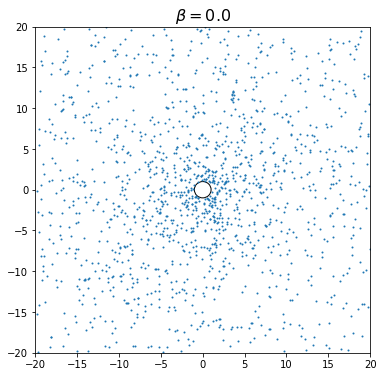

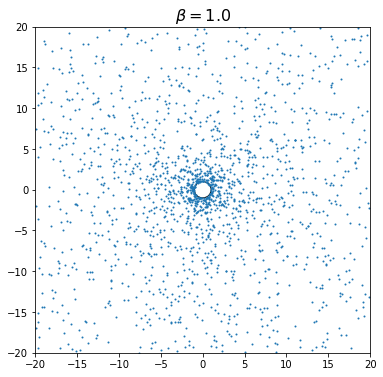

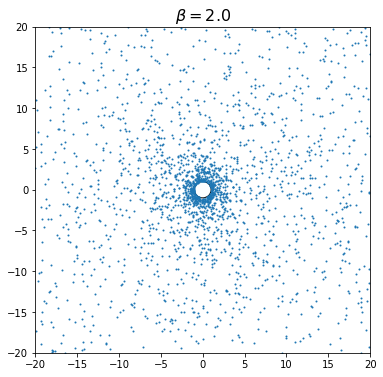

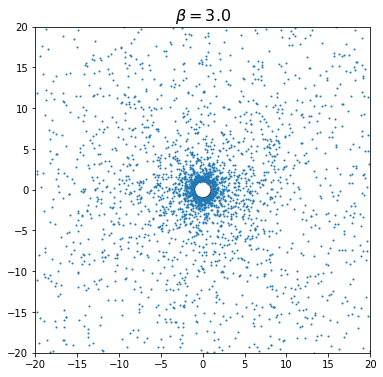

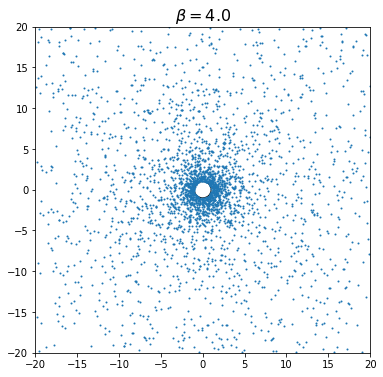

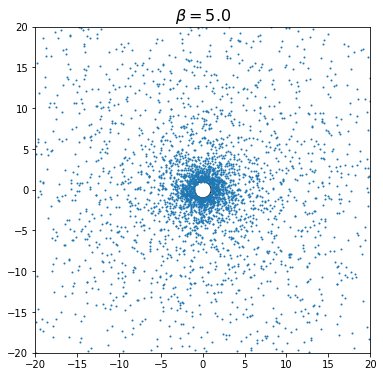

In [530]:
xbeta = {}
ybeta = {}
for beta in [0, 1, 2, 3, 4, 5]:
    xbeta[beta], ybeta[beta] = dowind(r0=1, v0=0.3, vinf=3, beta=beta, timemax=50, dt=0.05, npart=10000, dmax=20)

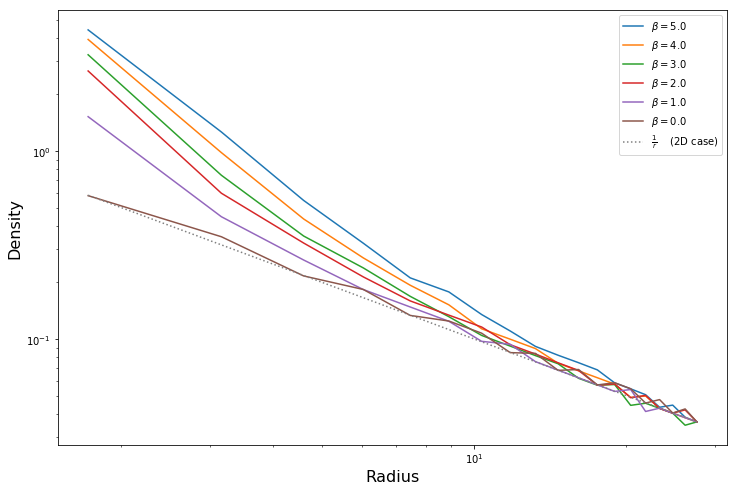

In [253]:
fig, ax = plt.subplots(figsize = (12, 8))
for beta in np.array([0, 1, 2, 3, 4, 5])[::-1]:
    ax.loglog(xbeta[beta], ybeta[beta], label = r"$\beta = %3.1f$" % beta)
ax.loglog(xbeta[0], 1. / xbeta[0], ls = ':', c = 'gray', label = r"$\frac{1}{r}$    (2D case)")
ax.legend()
ax.set_xlabel("Radius", fontsize = 16)
ax.set_ylabel("Density", fontsize = 16)
plt.savefig("densityprofile.png")